# Chi Square

- Use Chi Square to check relationship between input column and output column 
- Only work on categorial Categorial dataset
- No work on categorial Numeric dataset

In [1]:
import pandas as pd

- All of these column are categorial columns

In [2]:
titanic = pd.read_csv('train.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


### How Chi-Square work?
Check Is there any relationship between sex/gender and survived? If there is a relation of sex/gender with survived then we can keep sex/gender feature otherwise we'll drop this feature.

To check this relationship we use chi square. 
- To form a `contingency table` between both features
    Contigency table is basically a frequency table as bellow.

#### Contingency Table

- also known as `Observed Value`

In [3]:
ct = pd.crosstab(titanic['Survived'], titanic['Sex'])
ct

Sex,female,male
Survived,,
0,81,468
1,233,109


In [4]:
ct = pd.crosstab(titanic['Survived'], titanic['Sex'], margins=True)
ct

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


## Chi Test

Now we will use chi2_contigency method. It will give us multiple values like statistic, pvalue, expected frequency and dof.

**Note:** Smaller `pvalue` means crazy difference between them then we'll reject null hypothsis and will say there is a relationship between features

In [8]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=263.05057407065567, pvalue=1.0036732821369117e-55, dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

- Let's Implement one by one to each feature

In [9]:
score = []

for feature in titanic.columns[:-1]:

    # Create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])

    # chitest
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

Now let's visualize `p value`

<Axes: >

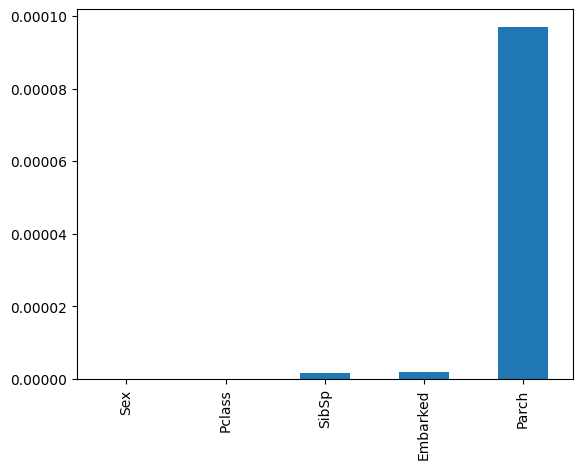

In [13]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

- There is an another technique use to calculate `p value`

Text(0, 0.5, 'P-value')

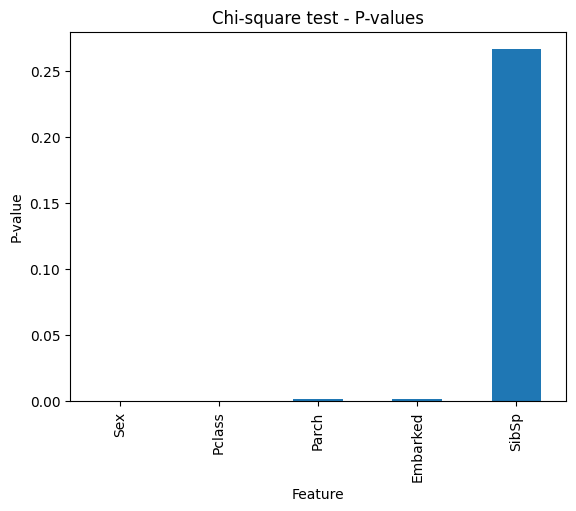

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

# Disadvantages
- **Categorical Data only:**
    The chi-square test can only be used with categorical variables.
    It is not suitable for continuous variables unless they have been discretized into
    categories, which can lead to loss of information.

- **Independent of Observation:**
    The chi-square test assumes that the observations are
    independent of each other. This might not be the case in datasets where observations
    are related (e.g., time series data, nested data).

- **Sufficent sample size:**
    Chi-square test requires a sufficiently large sample size. The
    results may not be reliable if the sample size is too small or if the frequency count in
    any category is too low (typically less than 5).
    
- **No variable Interaction:**
    Chi-square test, like other univariate feature selection
    methods, does not consider interactions between features. It might miss out on
    identifying important features that are significant in combination with other features.